In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("lesson_3_data__1_.csv", encoding="windows-1252")

In [3]:
df.shape

(48129, 21)

In [8]:
df.head(3)

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nº 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta


In [9]:
user_df = df[["tc", "art_sp"]]
user_df

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nº 5 500 G Brand_1
3,95931501,FIDEO FIDEUÁ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [10]:
user_df = user_df.rename(columns = {"tc":"user_id", "art_sp":"brand_info"})
user_df

,user_id,brand_info
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nº 5 500 G Brand_1
3,95931501,FIDEO FIDEUÁ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2
...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand


In [11]:
def split_brand(brand_name):
    return brand_name.split()[-1]

In [12]:
split_brand("FIDEOS 0 500 G Brand_4")

'Brand_4'

In [13]:
user_df["brand_name"] = user_df.brand_info.apply(split_brand)  
#user_df["brand_name"] = user_df.brand_info.apply(lambda x: x.split(" ")[-1])
user_df

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nº 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUÁ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2
...,...,...,...
48124,45518841,FIDEOS 0 500 G Brand_4,Brand_4
48125,110824211,PLUMAS 3 500 G Brand_4,Brand_4
48126,1408670389,MACARRONES 500 G Store_Brand,Store_Brand
48127,1408670389,SPAGHETTI 500 G Store_Brand,Store_Brand


In [14]:
user_purchase = user_df\
    .groupby("user_id", as_index=False)\
    .agg({"brand_name":"count"})\
    .rename(columns={"brand_name":"purchases"})

user_purchase.head()

,user_id,purchases
0,-1236394515,1
1,1031,6
2,4241,5
3,17311,2
4,17312,2


In [16]:
user_purchase.purchases.median()
#Половина пользователей имеют больше 2, а половина меньше

2.0

In [17]:
user_purchase.describe()

,user_id,purchases
count,1.176400e+04,11764.000000
mean,7.690517e+07,4.091210
std,1.622210e+08,4.573143
min,-1.236395e+09,1.000000
25%,1.503761e+07,1.000000
50%,4.682179e+07,2.000000
75%,9.311601e+07,5.000000
max,1.408849e+09,60.000000


In [18]:
user_purchase = user_purchase.query("purchases > 5")
user_purchase

,user_id,purchases
1,1031,6
11,25971,7
14,40911,27
21,63001,8
22,63441,6
...,...,...
11679,1010245999,12
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [19]:
user_df.groupby(["user_id", "brand_name"], as_index=False)\
    .agg({"brand_info":"count"})\
    .query("user_id == 1031")\
    .sort_values("brand_info", ascending=False)

,user_id,brand_name,brand_info
2,1031,Store_Brand,5
1,1031,Brand_3,1


In [20]:
loyal_df = user_df.groupby(["user_id", "brand_name"], as_index=False)\
    .agg({"brand_info":"count"})\
    .sort_values(["user_id", "brand_info"], ascending=[False, False])\
    .groupby("user_id")\
    .head(1)\
    .rename(columns = {"brand_name":"lovely_brand", "brand_info":"lovely_brand_purchases"})
    
loyal_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [21]:
user_unique_brands = user_df\
    .groupby("user_id", as_index=False)\
    .agg({"brand_name":pd.Series.nunique})\
    .rename(columns={"brand_name":"unique_brands"})
    
user_unique_brands


,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [ ]:
x = [10, 12, 4]

y = pd.Series(x)

In [22]:
user_purchase

,user_id,purchases
1,1031,6
11,25971,7
14,40911,27
21,63001,8
22,63441,6
...,...,...
11679,1010245999,12
11750,1408783189,10
11751,1408783379,6
11754,1408798879,8


In [23]:
user_unique_brands

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2
...,...,...
11759,1408817589,2
11760,1408825059,1
11761,1408832719,1
11762,1408840919,1


In [24]:
loyal_df

,user_id,lovely_brand,lovely_brand_purchases
18187,1408849249,Store_Brand,1
18186,1408840919,Store_Brand,1
18185,1408832719,Brand_4,3
18184,1408825059,Brand_1,1
18183,1408817589,Store_Brand,2
...,...,...,...
6,17312,Brand_1,1
5,17311,Brand_4,2
3,4241,Brand_4,3
2,1031,Store_Brand,5


In [26]:
merged_df = user_purchase\
    .merge(loyal_df, on="user_id")\
    .merge(user_unique_brands, on="user_id")
    

In [27]:
merged_df.head()

,user_id,purchases,lovely_brand,lovely_brand_purchases,unique_brands
0,1031,6,Store_Brand,5,2
1,25971,7,Store_Brand,5,2
2,40911,27,Brand_4,19,5
3,63001,8,Brand_4,7,2
4,63441,6,Store_Brand,4,2


In [28]:
loyal_users = merged_df.query("unique_brands == 1")

In [29]:
merged_df["loyality_score"] = merged_df.lovely_brand_purchases / merged_df.purchases

In [30]:
merged_df.head()

,user_id,purchases,lovely_brand,lovely_brand_purchases,unique_brands,loyality_score
0,1031,6,Store_Brand,5,2,0.833333
1,25971,7,Store_Brand,5,2,0.714286
2,40911,27,Brand_4,19,5,0.703704
3,63001,8,Brand_4,7,2,0.875000
4,63441,6,Store_Brand,4,2,0.666667


<AxesSubplot:>

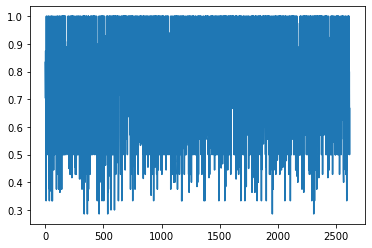

In [31]:
merged_df.loyality_score.plot()

In [32]:
brand_loyality = merged_df.groupby("lovely_brand", as_index = False)\
    .agg({"loyality_score":"median", "user_id":"count"})\
    .rename(columns={"user_id":"user_cnt"})

In [33]:
brand_loyality

,lovely_brand,loyality_score,user_cnt
0,Brand_1,0.666667,329
1,Brand_2,0.595455,64
2,Brand_3,0.500000,85
3,Brand_4,0.833333,1593
4,Brand_5,0.666667,3
5,Brand_7,0.455556,4
6,Store_Brand,0.733333,541


<AxesSubplot:>

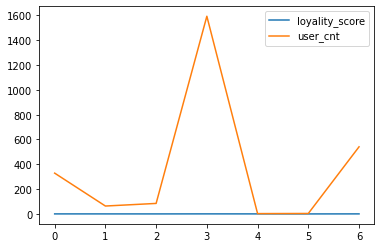

In [34]:
brand_loyality.plot()

<AxesSubplot:xlabel='lovely_brand'>

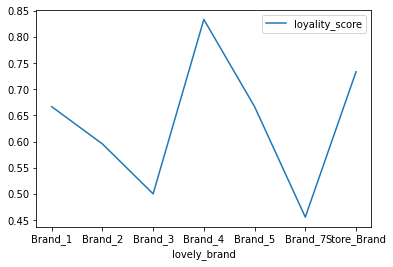

In [35]:
brand_loyality.plot(x="lovely_brand", y="loyality_score")

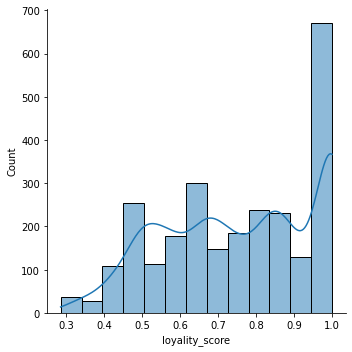

In [36]:
ax = sns.displot(merged_df.loyality_score, kde = True)

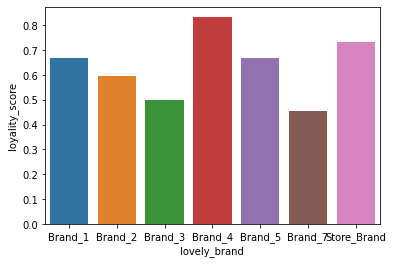

In [37]:
ax = sns.barplot(x="lovely_brand", y="loyality_score", data=brand_loyality)

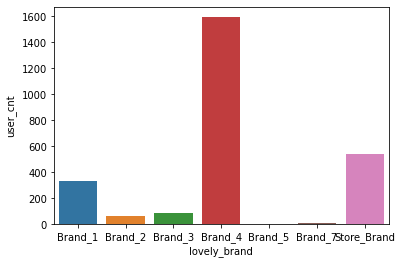

In [38]:
ax = sns.barplot(x="lovely_brand", y="user_cnt", data=brand_loyality)